8 8
-17181.055152443107 6.3590143591200095
Если аппроксимировать напрямую [-9.19162327e+08]
-16053.25800083733 5.473663574181394


/tmp/ipykernel_13421/2243266609.py:9: RuntimeWarning: divide by zero encountered in divide
  p = dfa/nf * w_nf/w_dfa
/tmp/ipykernel_13421/2243266609.py:11: RuntimeWarning: invalid value encountered in divide
  xi = p / (1+p) * 100; xi[-1] =100


ValueError: x and y must be the same size

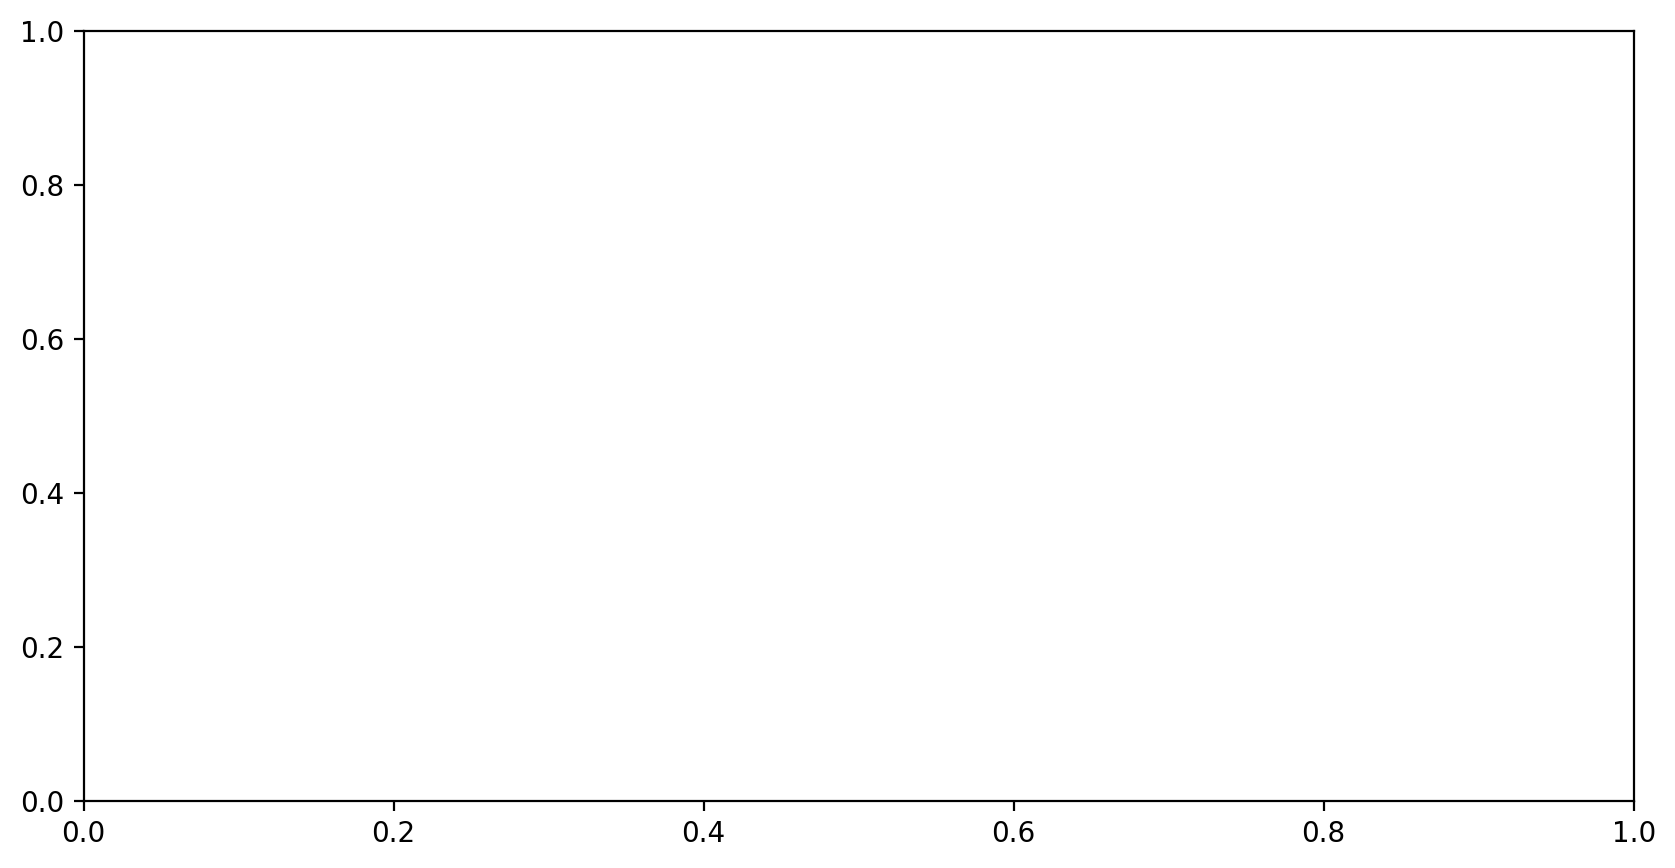

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

w_nf = np.array([0.000001, 15, 30, 40, 60, 70, 85, 100])
w_dfa = 100 - w_nf
dfa = 169.227
nf = 128.17052
p = dfa/nf * w_nf/w_dfa

xi = p / (1+p) * 100; xi[-1] =100
T = [52.5,40,31.2,30,54,64,70,80.2]
#xi = [0, 0.12, 0.34, 0.53, 0.64, 0.81,1]

x1 = xi[0:3]; t1 = T[0:3]
x2 = xi[3:];  t2 = T[3:]

# Экспериментальные данные
T1 = np.array([52.5,40,31.2]) + 273.15  # температуры в К
x1 = 1 - np.array([0, 1.88969258e+01, 3.61371033e+01])/100  # значения x_i
T2 = np.array([31.2,30,54,64,70,80.2]) + 273.15
x2 = np.array([3.61371033e+01,4.68146781e+01, 6.64484758e+01, 7.54947790e+01, 8.82101235e+01, 1.00000000e+02])/100

print(len(xi), len(T))


# Известные константы
R = 8.314  # Дж/(моль·К)

def y(x,k,b): return k*x + b


division = 0.393

T0 = 52.5
popt1, pcov = curve_fit(y,1/T1,np.log(x1))
x_1 = np.linspace(0, division, 100)
y_1 = popt1[0] / (np.log(1 - x_1) - popt1[1])
print(popt1[0]*R, popt1[1])

def T(x,H):
    a = np.log(x)*R/H
    b = 1/T0
    return 1/(a+b)
    
popt3, pcov3 = curve_fit(T,x1,T1)
print("Если аппроксимировать напрямую",popt3)
    

T0 = 80.2
popt2, pcov2 = curve_fit(y,1/T2,np.log(x2))
x_2 = np.linspace(division,1,100)
y_2 = popt2[0] / (np.log(x_2) - popt2[1])
print(popt2[0]*R, popt2[1])


ax = plt.figure(figsize = (10,5), dpi = 200)
plt.scatter(xi, T, label = "Экспериментальные данные")
plt.scatter([xi[0],xi[2],xi[-1]],[T[0],T[2],T[-1]],
           color = "red", label = "Справочные значения")
plt.plot(x_2*100,y_2-273.15,
        color = "black")
plt.plot(x_1*100,y_1-273.15,
        color = "black")
plt.plot(np.linspace(0,1,2)*100,np.ones(2)*y_2[0]-273.15,
        color = "black")

plt.text(0.178*100+1,42+1,"Контроль"); plt.plot(0.178*100,42,"o",color = "g")
plt.text(0.8*100,305-273.15, "Нафталин")
plt.text(0.05*100,305-273.15, "Дифениламин")
plt.plot(39.24,28,"o", color = "g")

plt.xlabel(r"$\chi_{{НФТ}}$")
plt.ylabel(r"$T,\ ^\circ C$")
plt.legend()
plt.grid(True)

"""tikz.save(f"../Obsidian/phase.tex", 
                axis_width = f"\\textwidth - 2cm",
                axis_height = "8.5cm")"""

#ax = tikz_convert(ax, mktex = True)

In [ ]:
print(r"|N смеси|$\omega_{\text{НФ}},\%$|$\chi_{\text{НФ}},\%$|Температура кристаллизации смеси $T_\text{ср}\celsius$|")
print(f"|-|-|-|-|")
for i in range(len(xi)):
    print(f"|{i+1}|{w_nf[i]:.1f}|{xi[i]:.2f}|{T[i]}|")

In [6]:
def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num},# -2 cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption{{{caption}}}
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None

[15845.40616398] 1080.6196157144013
[16576.89400775] 956.0588672692245


27.925294077627598

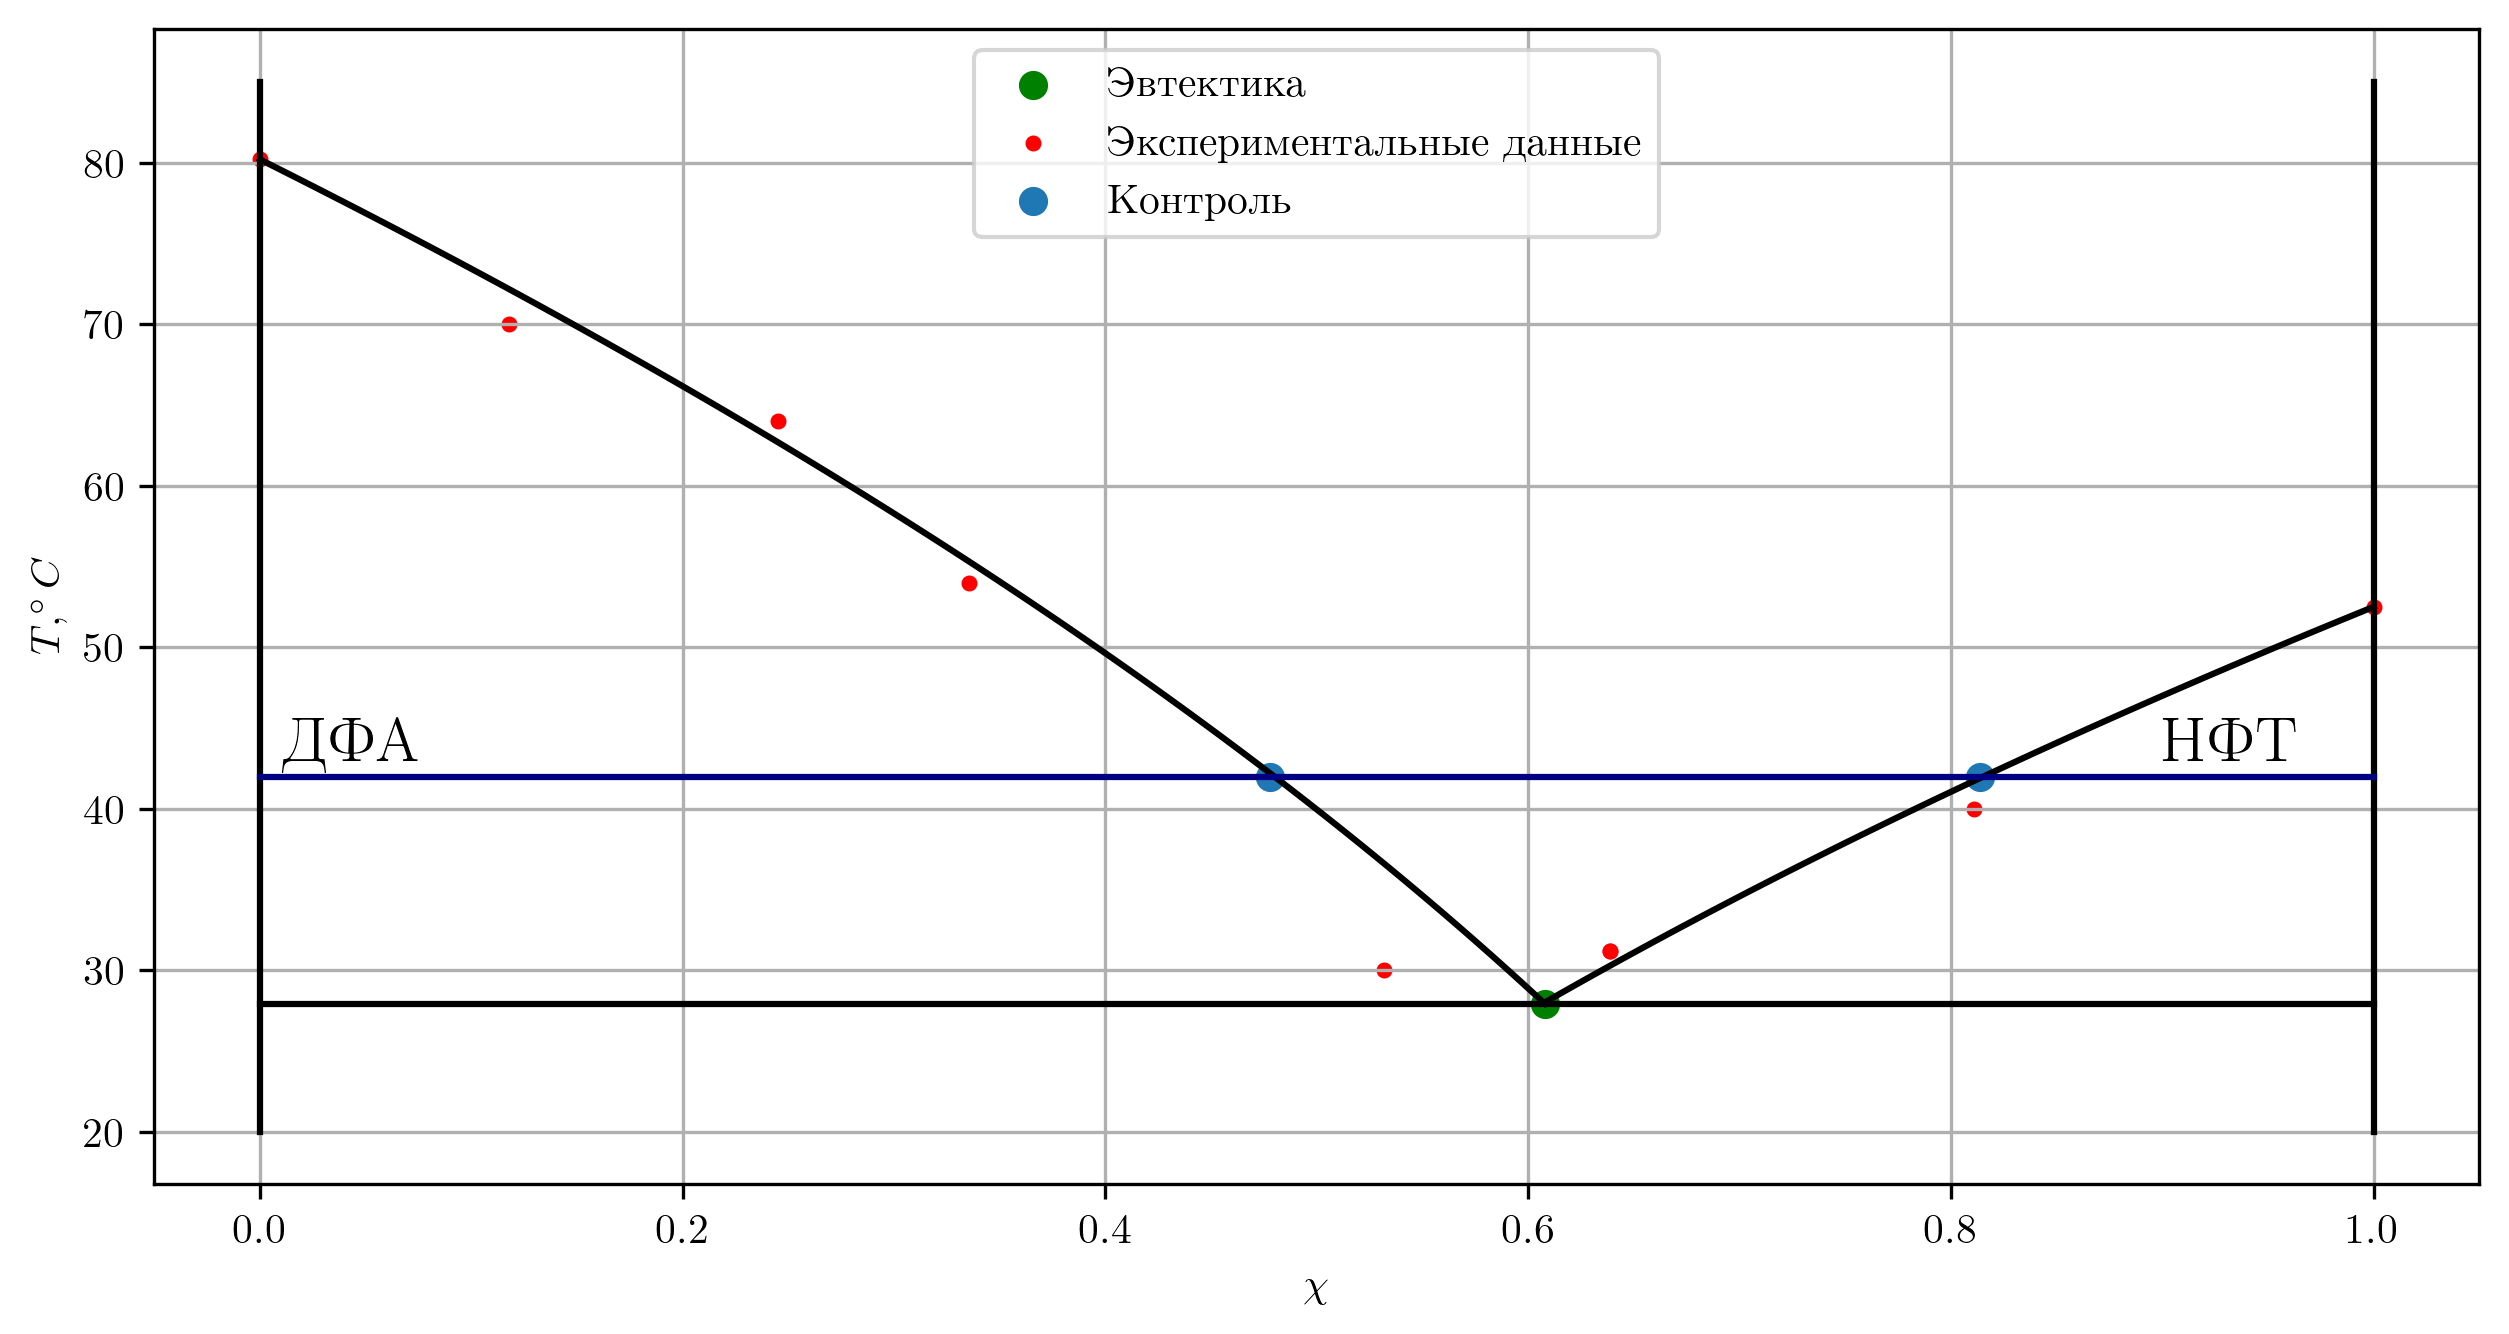

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})



dfa = {"xi": 1 - np.array([0, 1.88969258e+01, 3.61371033e+01])/100,
      "T": np.array([52.5,40,31.2])}

nf = {"xi": np.array([3.61371033e+01,4.68146781e+01, 6.64484758e+01, 7.54947790e+01, 8.82101235e+01, 1.00000000e+02])/100,
       "T": np.array([31.2,30,54,64,70,80.2])}



nf  = pd.DataFrame(nf)
dfa = pd.DataFrame(dfa)
T1 = 80.2 + 273.15
T2 = 52.5 + 273.15
R = 8.314


popt1, pcov1 = curve_fit(lambda x, H: -H/R*(x - 1/T1), 1/(nf["T"]+273.15), np.log(nf["xi"]))
print(popt1, pcov1[0][0]**0.5)


popt2, pcov2 = curve_fit(lambda x, H: -H/R*(x - 1/T2), 1/(dfa["T"]+273.15), np.log(dfa["xi"]))
print(popt2, pcov2[0][0]**0.5)

def T(x, H, T0):
  a = 1/T0
  b = np.log(x) * R / H
  return 1/(a-b) - 273.15



border = 0.608
x = np.linspace(0,border,100)
x2 = np.linspace(border,1,100)

ax = plt.figure(figsize = (10,5), dpi = 300)
plt.plot(x, T(1-x, popt1[0], 80.2+273.15), color = "black")

plt.plot(x2, T(x2, popt2[0], 52.5+273.15), color = "black")
plt.plot(np.array([0,1]),T(1-border, popt1[0], 80.2+273.15)*np.array([1,1]), color = "black")




plt.plot([0,0], [20,85], color = "black")
plt.plot([1,1], [20,85], color = "black")


plt.scatter(border,T(1-border, popt1[0], 80.2+273.15),
             color = "g", label = "Эвтектика")
plt.scatter(1 - nf["xi"], nf["T"], color = "r", s= 8, label = "Экспериментальные данные")
plt.scatter(dfa["xi"], dfa["T"], s= 8, color = "r")
plt.plot([0,1], [42,42], color = "navy")
plt.scatter([0.478, 0.814], [42,42], label="Контроль")

plt.text(0.01, 43, "ДФА", fontsize = 15)
plt.text(1-0.1, 43, "НФТ", fontsize = 15)


plt.ylabel("$T, ^\\circ C$")
plt.xlabel("$\\chi_{{дфа}}$")
plt.grid()
plt.legend()
plt.savefig("Фазовая диаграмма")


"""
tikz_convert(ax, 
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "Фазовая диаграмма.tex",
             caption = "Фазовая диаграмма дифениламин-нафталин")
"""

T(1-border, popt1[0], 80.2+273.15)

# from tabulate import tabulate
dfa.xi = np.round(100 - dfa.xi * 100,2)
nf.xi = np.round(nf.xi * 100,2)
print(tabulate(dfa, tablefmt = "github"))
print(tabulate(nf, tablefmt = "github"))